In [1]:
#Preprocessing Data
import pandas as pd
import numpy as np
df = pd.read_csv('Employee info.csv')

In [2]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [7]:
#Replace 'Height' column with values between 150 to 180 cm
df['Height'] = np.random.randint(150, 181, size=len(df))
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,171,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,167,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,154,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,175,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,167,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,172,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,160,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,156,231,Kansas,947276.0


In [9]:
#to check if there is any inconsistency
df.describe()

,Number,Age,Height,Weight,Salary
count,458.000000,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,164.694323,221.543668,4.833970e+06
std,15.966837,4.400128,8.856404,26.343200,5.226620e+06
min,0.000000,19.000000,150.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,157.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,164.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,172.000000,240.000000,6.500000e+06
max,99.000000,40.000000,180.000000,307.000000,2.500000e+07


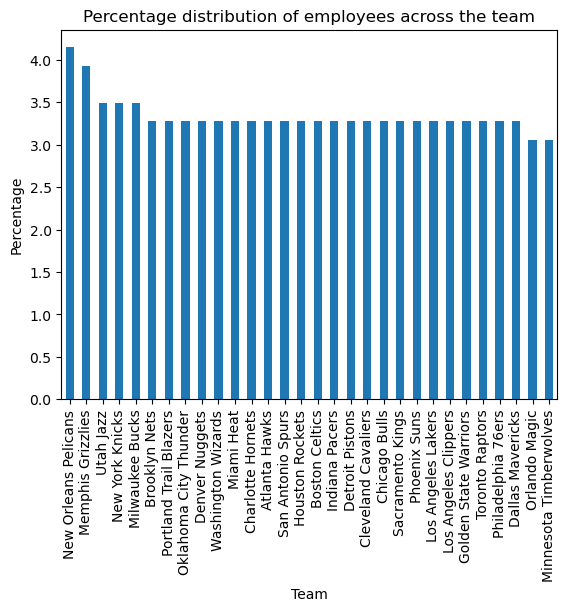

In [69]:
#Analysis Tasks
#Task 1: Determine distribution of employees across each team
Employee_distribution_across_team = df['Team'].value_counts()
Employee_distribution_across_team

#calculate the % split relative to the total no of employees
Percentage_split = (Employee_distribution_across_team/len(df))*100
Percentage_split

#visualization
#Bar graph
import matplotlib.pyplot as plt
Percentage_split.plot(kind='bar', title = 'Percentage distribution of employees across the team')
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.show()

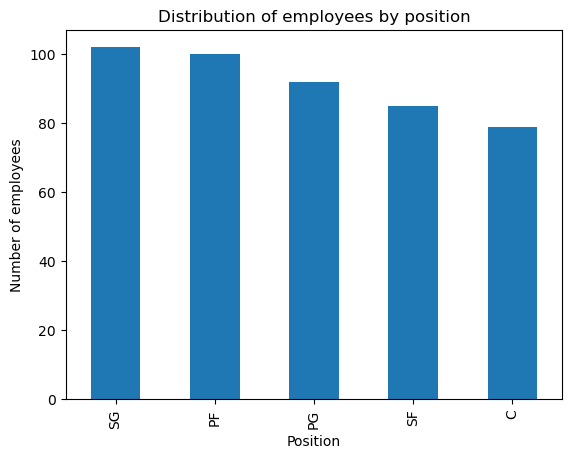

In [73]:
#Task 2: Segregate employees based on their position within the company
Employee_distribution_by_position = df['Position'].value_counts()
Employee_distribution_by_position

#visualization
#Bar graph
Employee_distribution_by_position.plot(kind='bar', title='Distribution of employees by position')
plt.xlabel('Position')
plt.ylabel('Number of employees')
plt.show()

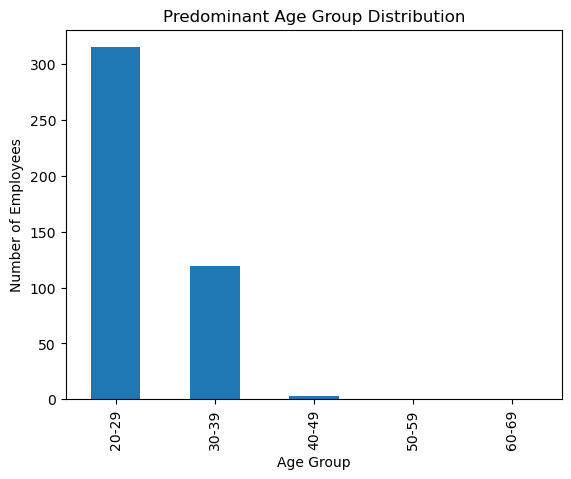

In [77]:
#Task 3: Identify predominant age group among employees
#setting age groups
#assigning each employees to the particular group
Age_section = [20, 29, 39, 49, 59, 69]
Age_range = ['20-29', '30-39', '40-49', '50-59', '60-69']
df['Age_group'] = pd.cut(df['Age'], bins=Age_section, labels=Age_range)

#count employees by age group
Employee_distribution_age = df['Age_group'].value_counts()
Employee_distribution_age

#visualization
#Bar graph
Employee_distribution_age.plot(kind='bar', title='Predominant Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

Team with highest salary expenses: ('Cleveland Cavaliers', 106988689.0)
Position with highest salary expenses: ('C', 466377332.0)


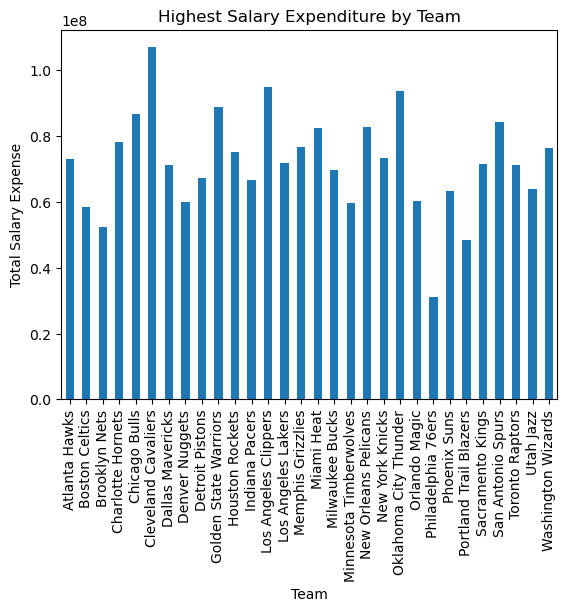

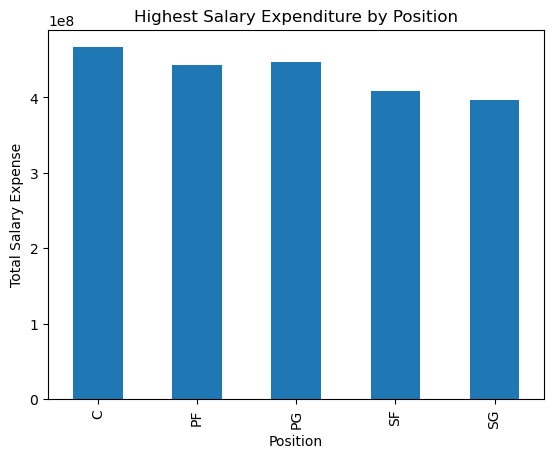

In [53]:
#Task 4: Determine which team & position have highest salary expenditure
#finding sum of salary expenses by team & position 
Team_salary_expenditure = df.groupby('Team')['Salary'].sum()
Position_salary_expenditure = df.groupby('Position')['Salary'].sum()
Team_salary_expenditure
Position_salary_expenditure

#Finding team & position having highest salary expenses
Team_HE = Team_salary_expenditure.idxmax(), Team_salary_expenditure.max()
Position_HE = Position_salary_expenditure.idxmax(), Position_salary_expenditure.max()
print(f"Team with highest salary expenses: {Team_HE}")
print(f"Position with highest salary expenses: {Position_HE}")

# visualization for team salary expense
#Bar graph
Team_salary_expenditure.plot(kind='bar', title='Highest Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary Expense')
plt.show()

# visualization for position salary expense
#Bar graph
Position_salary_expenditure.plot(kind='bar', title='Highest Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary Expense')
plt.show()

Correlation between age and salary: 0.21400941226570974


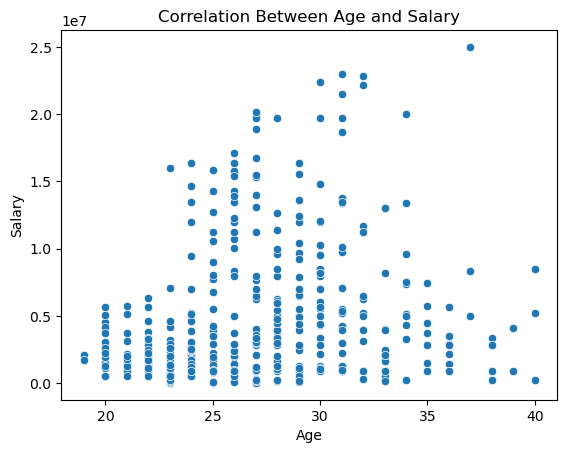

In [57]:
#Task 5: Investigate correlation between age & salary
Relation_btw_age_salary = df['Age'].corr(df['Salary'])
print(f"Correlation between age and salary: {Relation_btw_age_salary}")

#visualization
#scatter plot
import seaborn as sns
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()